### **Análise Exploratória Inicial**

In [17]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Carregar o dataset
df=pd.read_csv('airline_passenger_satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
# Verificar colunas e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [3]:
# Verificar valores ausentes
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [4]:
df.shape

(103904, 25)

Durante a etapa inicial de exploração do conjunto de dados, foram realizadas as seguintes observações:

- O dataset possui **25 colunas**.
- A coluna `Arrival Delay in Minutes` apresenta **310 registros ausentes**, o que representa menos de 0,3% do total de registros. Considerando o volume de dados (>100.000 registros), foi decidido que esses registros seriam removidos, já que a eliminação não compromete a representatividade do conjunto.
- As seguintes colunas foram identificadas como **não quantitativas** e, portanto, não serão incluídas na Análise de Componentes Principais (PCA):
  - `Gender`
  - `Customer Type`
  - `Type of travel`
  - `Class`
  - `satisfaction`

A análise demonstrou que, excetuando a coluna `Arrival Delay in Minutes`, **não há presença significativa de valores ausentes** no restante do dataset.  
Além disso, foi constatado que existe um número suficiente de variáveis quantitativas relevantes para que o PCA seja aplicado de forma significativa.

Com estas observações, foi possível definir o plano de preparação e limpeza dos dados para a aplicação do PCA.


### **Preparação dos Dados para PCA**

In [5]:
# Remover registors com valores ausentes
df = df.dropna()

# Confirmar que não temos mais valores ausentes
df.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [6]:
# Remover colunas não quantitativas
cols_drop = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Unnamed: 0', 'id']

df = df.drop(cols_drop, axis=1)
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [7]:
# Inicializar o scaler
scaler = StandardScaler()

# Ajustar e transformar os dados
df_scaled = pd.DataFrame(scaler.fit_transform(df))

# Retornar os nomes originais das colunas
df_scaled.columns = df.columns
df_scaled.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.745542,-0.731305,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905
1,-0.951526,-0.956916,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184
2,-0.885358,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229
3,-0.951526,-0.629028,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,-1.018992,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662
4,1.430521,-0.977973,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,-0.268818,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229


Após a análise exploratória, foi realizada a preparação dos dados para a aplicação do PCA, contemplando as seguintes etapas:

- **Escalonamento dos dados**: foi aplicada a técnica de **StandardScaler**, garantindo que todas as variáveis quantitativas estejam na mesma escala e, portanto, possam ser comparadas de maneira apropriada no contexto do PCA.
- **Tratamento de valores ausentes**: a coluna `Arrival Delay in Minutes`, que apresentava registros nulos, teve esses registros removidos, por baixa representividade.
- **Conversão para DataFrame**: os dados escalonados foram convertidos novamente em um DataFrame Pandas, preservando os nomes originais das colunas quantitativas para facilitar a interpretação dos componentes principais.

Com a finalização desta etapa, os dados encontram-se devidamente preparados e prontos para a aplicação do PCA, assegurando que a técnica possa capturar de forma adequada as **estruturas latentes** e as **relações entre variáveis** que influenciam a satisfação dos clientes no contexto da companhia aérea.


### **Aplicação do PCA + Scree Plot**

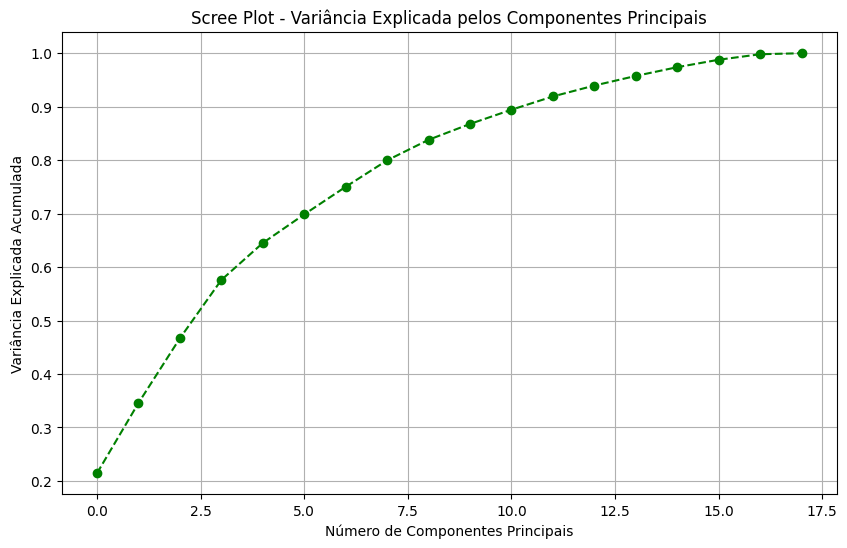

In [8]:
# Instanciando o PCA
pca = PCA()
pca.fit(df_scaled)

# Variância explicada por componente
exp_variance = pca.explained_variance_ratio_

# Plot - Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(exp_variance), marker='o', linestyle='--', color='g')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Scree Plot - Variância Explicada pelos Componentes Principais')
plt.grid(True)
plt.show()

In [9]:
# Exibir variância explicada por componente
for i, var in enumerate(exp_variance):
    print(f"Componente Principal {i+1}: {100*var:.2f}%")

Componente Principal 1: 21.45%
Componente Principal 2: 13.13%
Componente Principal 3: 12.11%
Componente Principal 4: 10.90%
Componente Principal 5: 6.92%
Componente Principal 6: 5.35%
Componente Principal 7: 5.16%
Componente Principal 8: 4.95%
Componente Principal 9: 3.84%
Componente Principal 10: 2.97%
Componente Principal 11: 2.66%
Componente Principal 12: 2.48%
Componente Principal 13: 2.04%
Componente Principal 14: 1.80%
Componente Principal 15: 1.64%
Componente Principal 16: 1.39%
Componente Principal 17: 1.03%
Componente Principal 18: 0.19%


Após a aplicação do PCA, foi gerado o **Scree Plot** que demonstra a proporção da variância explicada por cada componente principal.

- **Número de componentes relevantes**: a partir da análise visual do gráfico, observou-se que aproximadamente **15 componentes** são suficientes para explicar cerca de **84% da variância total** da base de dados, um resultado robusto para datasets com múltiplas variáveis.
  
- **Ponto de inflexão**: a curva de variância acumulada não apresentou um ponto de inflexão claro (cotovelo bem definido), indicando que a redução da variância explicada por componente ocorre de forma gradual.

- **Comportamento geral da curva**: o padrão da curva sugere a presença de **alta correlação entre as variáveis** originais, refletindo uma estrutura latente subjacente que o PCA consegue capturar e resumir eficientemente.

Este resultado fornece um excelente ponto de partida para as próximas etapas de interpretação dos componentes e análise dos fatores latentes que influenciam as decisões de compra dos clientes.


In [10]:
# Aplicação PCA com número de componentes definido (15)
pca_n = PCA(n_components=15)
pca_n.fit(df_scaled)
components = pca_n.components_

# Criar datafram com as cargas dos componentes
loadings_df = pd.DataFrame(components.T,
                           columns=[f"PC{i+1}" for i in range(15)],
                           index=df_scaled.columns)

# Visualizar as primeiras linhas da matriz de carga
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Age,0.071205,0.010121,-0.102670,-0.009335,0.525478,0.374055,-0.423176,-0.557907,-0.001343,-0.088751,-0.132088,0.214887,0.006798,-0.050105,-0.020843
Flight Distance,0.119575,-0.019797,-0.011135,0.021358,0.487348,-0.132316,-0.358734,0.732213,-0.144626,0.062533,-0.054723,0.160005,0.001629,-0.083847,0.004567
Inflight wifi service,0.231036,0.449677,-0.043417,-0.013758,0.014004,-0.280815,0.206808,-0.149054,-0.029680,-0.013772,-0.002693,0.286489,-0.033669,-0.379876,0.121698
Departure/Arrival time convenient,0.099183,0.417427,0.026217,-0.008813,-0.193659,0.438575,-0.159282,0.089673,-0.019287,0.701883,-0.117047,-0.156561,0.014932,0.056262,-0.044442
Ease of Online booking,0.162633,0.536499,-0.045977,-0.016076,0.050210,-0.186495,0.099179,-0.013730,-0.010366,-0.034711,-0.005034,0.176119,0.019019,-0.064953,0.112546
Gate location,0.064054,0.430277,-0.033572,-0.010142,-0.262294,0.217873,-0.361072,0.172368,0.101241,-0.629259,0.154273,-0.175425,-0.014055,0.195143,-0.107291
Food and drink,0.302160,-0.157408,-0.338879,-0.003792,-0.254359,-0.019427,-0.037931,0.026046,0.022169,0.082078,-0.044503,0.515639,-0.043045,0.594376,0.188506
Online boarding,0.286985,0.151588,-0.169917,-0.002119,0.425963,-0.159153,0.337371,-0.088667,-0.182309,-0.007880,-0.030042,-0.410575,0.037896,0.479636,-0.270343
Seat comfort,0.345632,-0.153056,-0.313869,0.006024,0.012032,0.106246,-0.022935,0.023966,0.041524,-0.045142,0.007724,-0.486881,0.005564,-0.207951,0.667014
Inflight entertainment,0.422224,-0.177278,-0.064613,0.030309,-0.183369,-0.104570,-0.171778,-0.073699,-0.049804,-0.022954,0.039695,0.103797,0.054178,-0.183681,-0.105369


Após a aplicação do PCA com 15 componentes, foi gerada a matriz de carga para interpretar como cada variável original influencia os fatores latentes (componentes principais).

- **PC1**: As variáveis com maior carga absoluta foram **Inflight entertainment**, **Cleanliness**, e **Seat comfort**. Este componente parece capturar um fator relacionado ao **conforto geral e qualidade da experiência a bordo**.

- **PC2**: As variáveis com maior carga foram **Ease of Online booking**, **Inflight wifi service**, **Gate location**, e **Departure/Arrival time convenient**. Este componente aparenta representar um fator associado a **serviços de conveniência e eficiência logística**, incluindo a **experiência digital** no processo de viagem.

- **Interpretação geral**: A análise sugere que os fatores latentes identificados refletem duas dimensões principais da experiência do cliente: **conforto durante o voo** e **comodidade e experiência no processo de compra e viagem**.

Esta etapa é crucial para entender como as variáveis observáveis se agrupam em conceitos latentes que influenciam a **decisão de satisfação e escolha de companhias aéreas** pelos clientes.


### **Aplicar KMeans nos componentes**

k número:  2
k número:  3
k número:  4
k número:  5
k número:  6
k número:  7
k número:  8
k número:  9
k número:  10


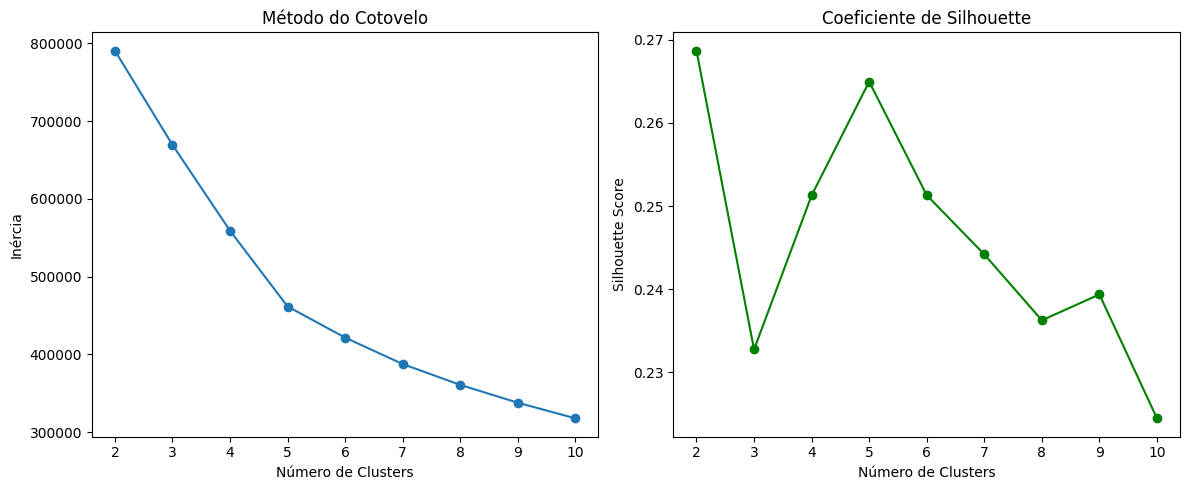

In [11]:
# Reduzindo para 4 componentes
pca_4 = PCA(n_components=4)
df_pca_4 = pca_4.fit_transform(df_scaled)

# Testar K de 2 a 10
inertia = []
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca_4)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_pca_4, kmeans.labels_))
    print('k número: ', k)

# Plot do método do cotovelo
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')

plt.subplot(1,2,2)
plt.plot(range(2, 11), silhouette, marker='o', color='green')
plt.title('Coeficiente de Silhouette')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Após aplicar uma redução de dimensionalidade via PCA com 4 componentes e realizar a clusterização com KMeans, foi utilizado o método do cotovelo e o coeficiente de silhouette para identificar o número ideal de clusters.

**Conclusões da Análise:**

- **Número de clusters sugerido**: A partir de 5 clusters, o método do cotovelo indicou um ponto de inflexão na curva de inércia, sugerindo que 5 clusters seria uma boa escolha.
- **Confirmação pelo silhouette**: O valor do coeficiente de silhouette confirmou essa escolha, apresentando seu ponto mais alto justamente em 5 clusters, validando a segmentação como consistente.
- **Aplicação para o negócio**: A segmentação obtida poderá trazer insights valiosos para a companhia aérea, pois possibilita agrupar clientes com perfis semelhantes. Isso abre espaço para campanhas de marketing mais personalizadas, melhorias de serviço direcionadas e ofertas específicas para diferentes grupos de clientes.

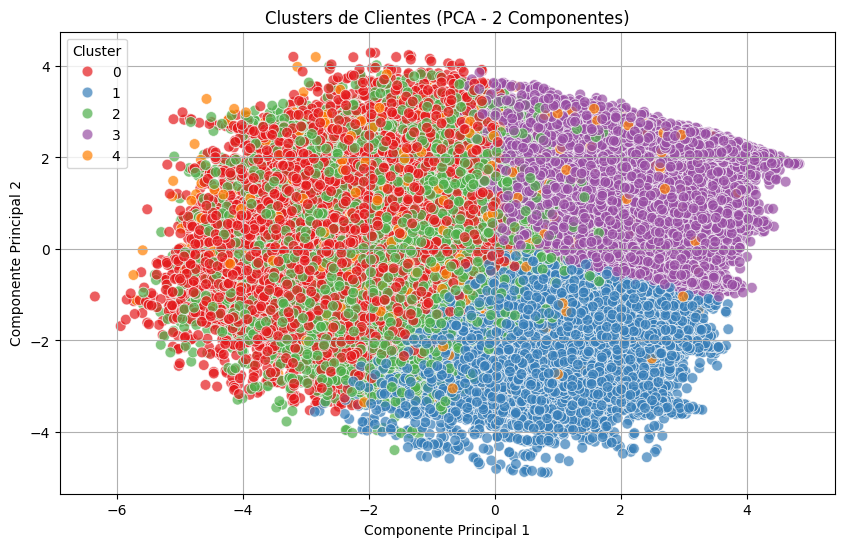

In [18]:
# Aplicar KMeans final
kmeans_final = KMeans(n_clusters=5, random_state=42)
clusters_final = kmeans_final.fit_predict(df_pca_4)

# Adicionar os clusters ao DataFrame reduzido para visualização
df_pca = pd.DataFrame(df_pca_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca['Cluster'] = clusters_final

# Visualização 2D dos clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7, s=60)
plt.title('Clusters de Clientes (PCA - 2 Componentes)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Análise Final da Segmentação de Clusters

Após a aplicação da técnica de **K-Means Clustering**, obtivemos uma segmentação da base de clientes da companhia aérea. A análise visual dos clusters revelou os seguintes pontos:

- **Separação dos clusters:** Alguns clusters apresentam uma separação mais clara (por exemplo, os grupos **azul** e **roxo**), enquanto outros (como **amarelo**, **vermelho** e **verde**) apresentam maior sobreposição. Isso indica que, embora exista uma segmentação perceptível, há grupos com perfis mais mistos.

- **Características marcantes:**
  - O **cluster azul** demonstra uma tendência mais forte em relação ao componente principal **PC1**, associado a fatores como **conforto no voo**.
  - O **cluster roxo** apresenta maior dispersão em relação ao **PC2**, que reflete aspectos relacionados a **serviços digitais e conveniência**.

- **Aplicações práticas para a companhia aérea:**
  - **Cluster azul:** Pode ser alvo de campanhas de **upgrades de assento**, programas de fidelização para passageiros que valorizam conforto e qualidade do serviço de bordo.
  - **Cluster roxo:** Estratégias focadas em **melhorar a experiência digital**, como ofertas de conectividade a bordo, serviços personalizados via app e programas de engajamento online.
  - **Clusters mistos:** Demandam uma análise complementar, cruzando com outras informações (como demografia ou frequência de viagem), para possibilitar ofertas mais direcionadas.

### Conclusão

Embora a separação dos clusters não seja perfeita, o modelo de segmentação oferece insights valiosos que podem ajudar a companhia aérea a personalizar suas ofertas e **desenvolver estratégias de marketing mais eficazes**. Com isso, a empresa pode otimizar tanto a experiência do cliente quanto seus resultados comerciais.
